>author: Quantified Bob
> 
>src: https://www.quantifiedbob.com/body-composition-data-visualization/

每天看到运动步数和消耗的热量，感觉心里有数。今天刚刚看到的一个博主**Quantified Bob**，数字化个人生理指标，通过历史数据更好的管理自我健康，历时十年的个人体重数据。通过这个案例，咱们可以学到

- pandas语法，如填充缺失值、30日均值计算
- matplotlib绘图，如何显示中文，加格子，图例，标题

<br>

使用 Jupyter Notebook/Python 可视化Bob 10 多年的身体成分（体重、体脂）数据。 不同颜色表示每个数据源(可穿戴设备)，趋势线为30天移动平均线。

## 导入数据

In [14]:
import pandas as pd

df = pd.read_csv('data/bob_weights.csv', parse_dates= ["日期"])
#日期排序
df.sort_values("日期", ascending = True, inplace=True)
df.head()

,日期,体重lb,体脂率%,数据源
0,2010-03-24,167.8,15.0,withings
1,2010-03-26,166.4,16.5,withings
2,2010-03-30,168.0,16.9,withings
3,2010-04-06,170.2,16.9,withings
4,2010-04-14,164.9,NaN,withings


## 可视化

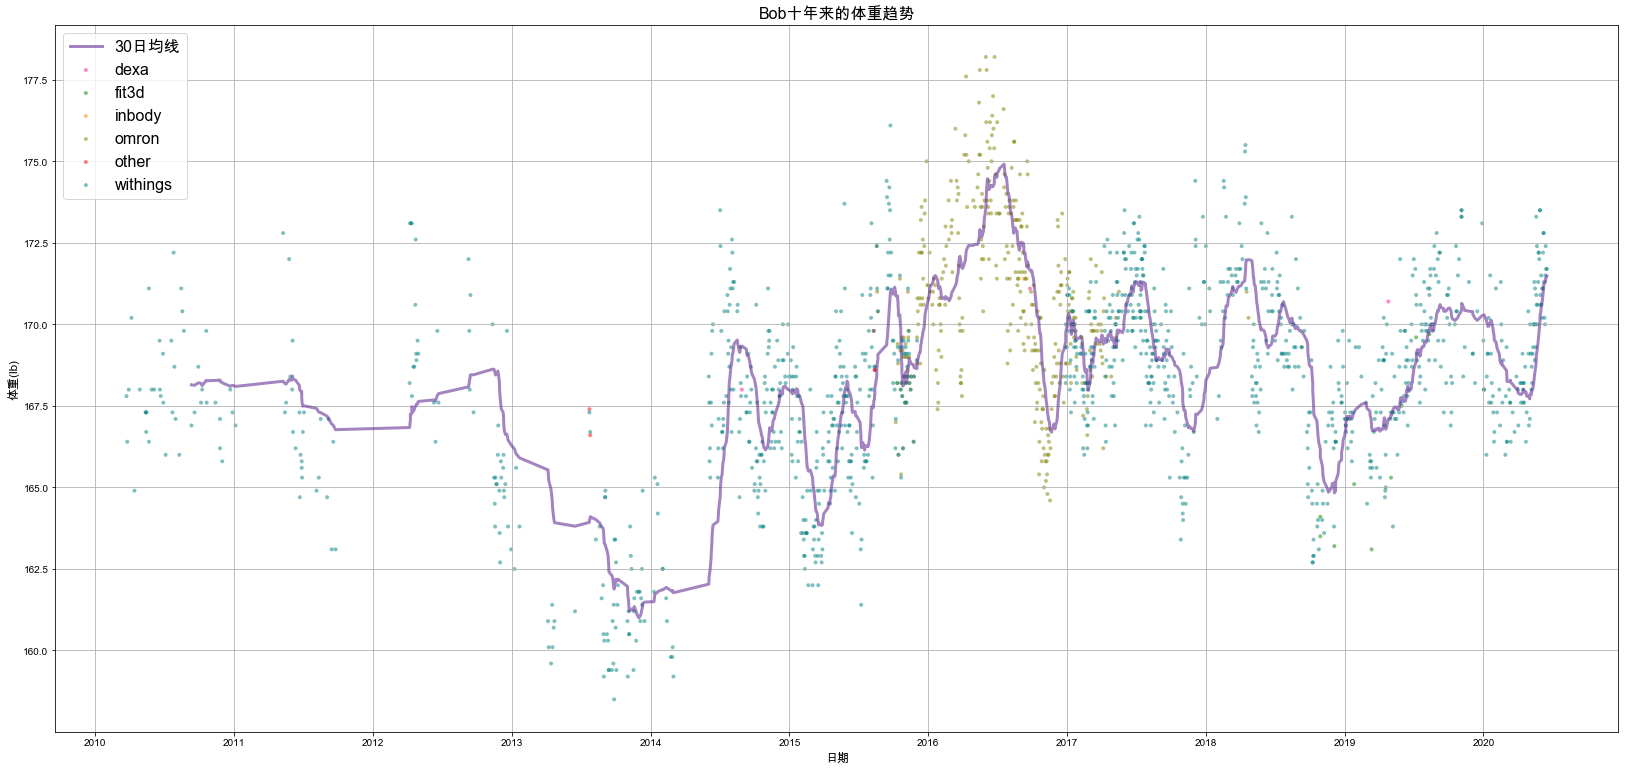

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#显示中文
matplotlib.rc("font", family='Arial Unicode MS') 

# create weights chart
fig, ax = plt.subplots()
ax.margins(0.05) # optional, adds 5% padding to autoscaling

# plot weight data
colors=["deeppink", "green", "darkorange", "olive", "red", "teal"]


i=0
for key, grp in df.groupby(['数据源']):
    ax.scatter(grp['日期'], 
               grp['体重lb'], 
               s=16, 
               label=key, 
               alpha=0.5, 
               edgecolors='none', 
               color=colors[i])
    i = i + 1

# 缺失值填充 & 30日移动均值
df["体重lb"].fillna(method ='ffill', inplace = True)
rolling_mean = df["体重lb"].rolling(window=30).mean()


ax.plot(df["日期"], 
        rolling_mean, 
        label='30日均线', 
        color='rebeccapurple', 
        alpha=0.6, 
        linewidth=3)

# title and axes
# plt.subplots_adjust(top=0.85)
plt.title("Bob十年来的体重趋势", fontsize=16, fontweight='bold')

plt.xlabel('日期', fontsize=12, fontweight='bold')

plt.ylabel('体重(lb)', fontsize=12, fontweight='bold')
# display x-axis ticks for every year using YYYY format
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# legend and grid lines
ax.legend(loc='upper left', fontsize=16)
ax.grid(True)

# resize chart
#plt.rcParams['figure.figsize'] = (18.0, 16.0)
plt.rcParams['figure.figsize'] = (28.0, 13.0)

# save image
plt.savefig('chart-weights.png', bbox_inches='tight')

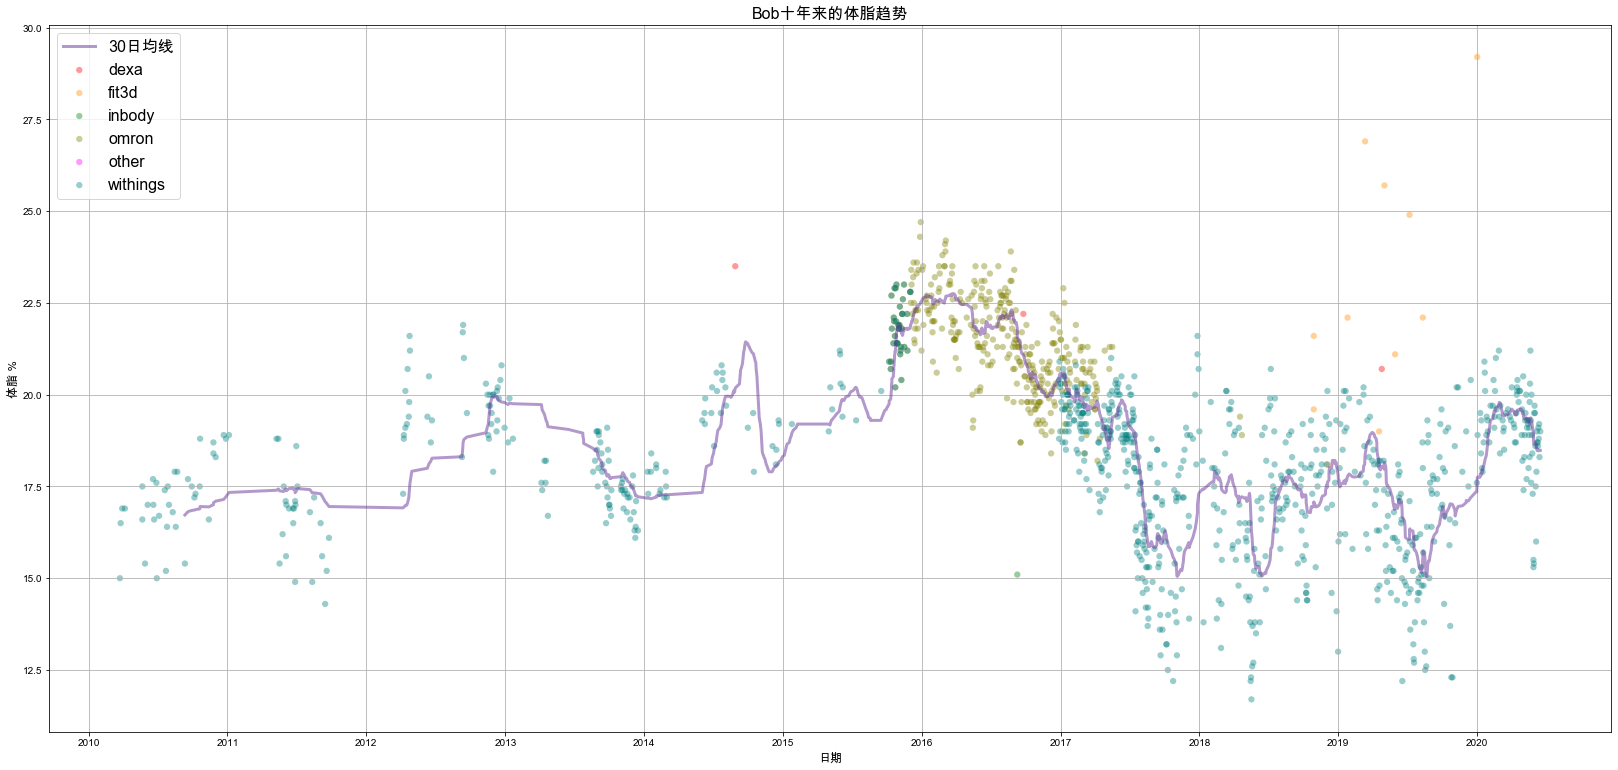

In [26]:
# 绘制体脂图
fig, ax = plt.subplots()
ax.margins(0.05)  #图标留白，可选 


colors=["red", "darkorange", "green", "olive", "magenta", "teal"]

i=0
for key, grp in df.groupby(['数据源']):
    ax.scatter(grp['日期'], grp['体脂率%'], s=40, label=key, alpha=0.4, edgecolors='none', color=colors[i])
    i = i + 1

# 缺失值填充 & 移动均值
df["体脂率%"].fillna( method ='ffill', inplace = True)
rolling_mean = df["体脂率%"].rolling(window=30).mean()
ax.plot(df["日期"], rolling_mean, label='30日均线', color='rebeccapurple', alpha=0.5, linewidth=3)

# 标题 & 坐标轴标签
plt.title('Bob十年来的体脂趋势', fontsize=16, fontweight='bold')
plt.xlabel('日期', fontsize=12, fontweight='bold')
plt.ylabel('体脂 %', fontsize=12, fontweight='bold')

# 横轴日期设置
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# 图例 & 格子线
ax.legend(loc='upper left', fontsize=16)
ax.grid(True)

# 更改图的尺寸
plt.rcParams['figure.figsize'] = (18.0, 16.0)
# plt.rcParams['figure.figsize'] = (28.0, 13.0)

# 保存
plt.savefig('chart-bodyfats.png', bbox_inches='tight')